Evaluasi Model:
Akurasi: 0.77
Confusion Matrix:
[[16 14]
 [13 74]]
Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.53      0.54        30
         Low       0.84      0.85      0.85        87

    accuracy                           0.77       117
   macro avg       0.70      0.69      0.69       117
weighted avg       0.77      0.77      0.77       117



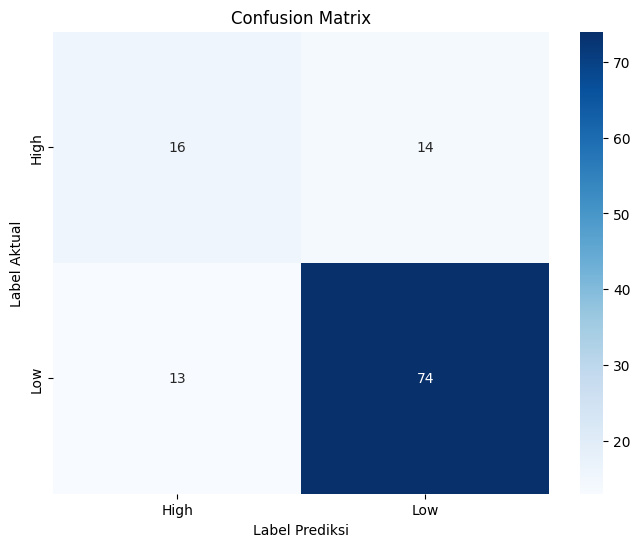

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Muat dataset
file_path = 'NetflixOriginals.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Pra-pemrosesan
# Ubah 'Premiere' menjadi datetime, tangani potensi kesalahan
data['Premiere'] = pd.to_datetime(data['Premiere'], format='%B %d. %Y', errors='coerce')  
data['Premiere'] = pd.to_datetime(data['Premiere'], format='%B %d, %Y', errors='coerce') 
# Jika 'Premiere' masih bukan datetime setelah mencoba kedua format, coba tebak formatnya
if data['Premiere'].dtype != 'datetime64[ns]':
    data['Premiere'] = pd.to_datetime(data['Premiere'], errors='coerce')

data['Year'] = data['Premiere'].dt.year  # Ekstrak tahun dari Premiere

# Tentukan target klasifikasi: Tinggi (Skor IMDB >= 7.0) atau Rendah (Skor IMDB < 7.0)
data['IMDB_Class'] = data['IMDB Score'].apply(lambda x: 'High' if x >= 7.0 else 'Low')

# One-Hot Encoding untuk fitur kategorikal
categorical_features = ['Genre', 'Language']
# Ganti 'sparse' dengan 'sparse_output' untuk versi scikit-learn yang lebih baru
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Gabungkan fitur yang dienkode dengan fitur numerik
numerical_features = ['Runtime', 'Year']
X = pd.concat([data[numerical_features], encoded_df], axis=1)

y = data['IMDB_Class']  # Target klasifikasi

# Standarisasi fitur numerik
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Cetak hasil evaluasi
print("Evaluasi Model:")
print(f"Akurasi: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Aktual')
plt.title('Confusion Matrix')
plt.show()